In [1]:
import matplotlib.pyplot as plt
import subprocess
import numpy as np
import pickle

%matplotlib inline

In [2]:
import seaborn as sns
sns.set_palette('bright')
cols = sns.color_palette('bright')

In [3]:
with open('../saved-experiments/resnet_width_logs.pkl', 'rb') as handle:
    plotting_dict = pickle.load(handle)

In [4]:
output_ordering = np.array(plotting_dict['logs_order'])
output_log = plotting_dict['logs']
hessian_eff_dim_list = plotting_dict['hessian_eff_dim']
xaxis = plotting_dict['xaxis']

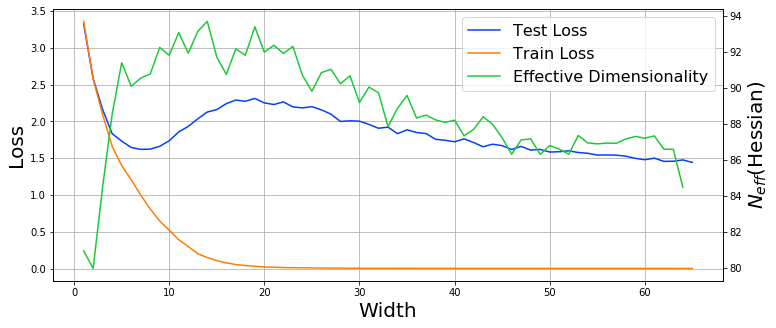

In [5]:
fig, ax = plt.subplots(figsize=(12,5))
ax.plot(output_ordering[np.argsort(output_ordering)], output_log[np.argsort(output_ordering),4], 
         label = 'Test Loss', color = cols[0])
ax.plot(output_ordering[np.argsort(output_ordering)], output_log[np.argsort(output_ordering),2], 
         label = 'Train Loss', color=cols[1])


#ax.legend()
ax.set_xlabel('Width', fontsize=20)
ax.set_ylabel('Loss', fontsize=20)

ax2 = ax.twinx()
ax2.plot(xaxis, hessian_eff_dim_list, label = 'Effective Dimensionality',
        color=cols[2])

lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, fontsize=16)
ax2.set_ylabel(r'$N_{eff}$(Hessian)', fontsize=20)

ax.grid()
plt.savefig('../dnn_double_descent.pdf', bbox_inches='tight')